<a href="https://colab.research.google.com/github/Swetha1001/Swetha_Data_Analyst_Portfolio/blob/main/Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salary Analysis

This project provides a comprehensive analysis of salaries in the global data job market using the data_jobs.csv dataset.

The objective is to uncover key insights related to compensation trends, including:


1.   Average and median salaries across data roles

2.   Roles with the highest and lowest pay


1.   Salary differences by experience level (Junior, Mid, Senior, Executive)


1.   Geographic trends: which countries or regions offer the highest salaries


1.   Salary distributions and outliers across the industry

By combining data exploration, visualization, and actionable insights, this project highlights how compensation varies across roles, locations, and experience levels, helping users make informed career and hiring decisions.


This project is helpful for:


*   Job Seekers — to understand which roles and locations offer competitive salaries

*  Recruiters & Hiring Teams — to benchmark salary ranges and attract talent effectively

*  Career Switchers & Students — to choose data roles that align with compensation goals

*  Data Analysts / Learners — to practice real-world exploratory data analysis (EDA) and storytelling

In [34]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

1. Salary by Job Titles

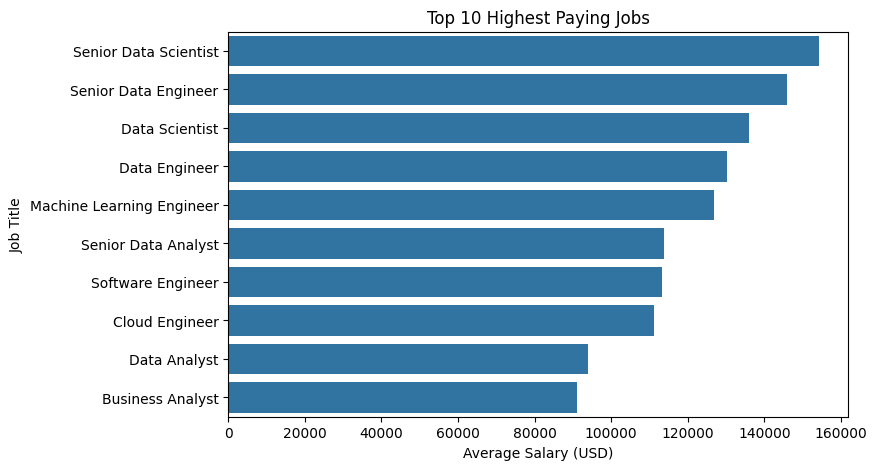

In [14]:
top_roles = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_roles.values, y=top_roles.index)
plt.title("Top 10 Highest Paying Jobs")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.show()

2. Salary by Country

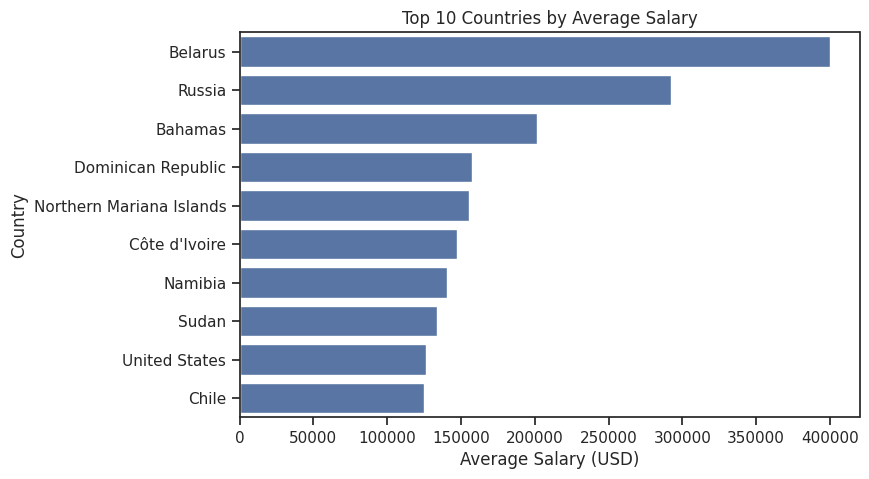

In [30]:
top_countries = df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country")
plt.show()


3. Salary Distribution by Job Title in India


In [26]:
# filter data to only include salary values from India

df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])


In [27]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

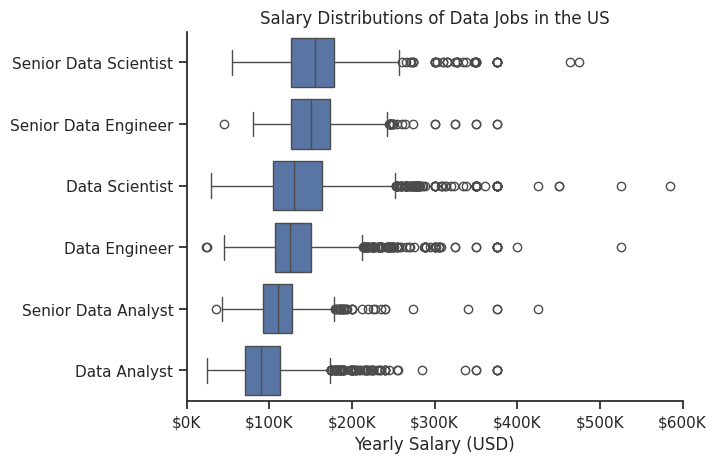

In [29]:
#Plot the top 6 job titles salary distributions using a box plot.

sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()